In [1]:
import pandas as pd

import keras
from keras import layers
import keras.backend
from keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout
import keras.models
import keras.utils

# Helper libraries
import numpy as np
from scipy import stats,special
import matplotlib.pyplot as plt
from matplotlib.colors import SymLogNorm
import math
import time
import h5py

import sklearn
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc

import innvestigate
import innvestigate.utils as iutils


import os

Using TensorFlow backend.
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarn

Import data from RNN_data.npz

In [2]:
# training data
data_train = np.load('data/jetConstTrain_overlap1.npz')
data_test = np.load('data/jetConstTest_overlap1.npz')
batch = len(data_train['pt1'][1])
feat_all = [key for key in data_train.keys()]
feat_all.remove('labels')
print(feat_all)
print(len(data_train['pt1']))

['pt1', 'pt2', 'dtheta1', 'dtheta2', 'dphi1', 'dphi2', 'theta', 'r1', 'r2', 'z']
1000000


In [3]:
def build_model(rnn_units, batch, n):
    inpts = []
    for i in range(n):
        inpt = layers.Input(shape = (batch,1))
        inpts.append(inpt)
    x = layers.concatenate(inputs = inpts,axis=-1, name = 'concat')
    x = layers.GRU(4*rnn_units, return_sequences = True, name = 'gru1')(x)
    x = layers.GRU(4*rnn_units, return_sequences = True, name = 'gru2')(x)
    x = layers.BatchNormalization()(x)
    x = layers.GRU(rnn_units, return_sequences = True, name = 'gru3')(x)
    x = layers.Dense(256, activation='relu', name = 'relu')(x)
    x = layers.Flatten(name = 'flatten')(x)
    output = layers.Dense(2, activation='softmax', name = 'softmax')(x)
    model = keras.models.Model(inputs=inpts, outputs=output)
    optimizer = keras.optimizers.Adam(clipnorm = 1.0)
    model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['categorical_crossentropy', 'accuracy'])
    return model

In [4]:
def build_XY(features,label,dic):
    X = [dic[key] for key in features]
    Y = [dic[key] for key in label]
    return X,Y
features = [feat_all[i] for i in range(6)]
print(features)
X_train, Y_train = build_XY(features,['labels'],data_train)
X_test, Y_test = build_XY(features,['labels'],data_test)
rnn_units = 32
# RNN = build_model(rnn_units, batch, 6)

['pt1', 'pt2', 'dtheta1', 'dtheta2', 'dphi1', 'dphi2']


In [5]:
# X_batch = [ele[:10] for ele in X_train]
# Y_batch = [ele[:10] for ele in Y_train]
# example_result = RNN.predict(x = X_batch)
# results = RNN.evaluate(x = X_batch, y = Y_batch )
# print(results)

In [6]:
# X_batch = [ele for ele in X_train]
# Y_batch = [ele for ele in Y_train]
# X_batch_test = [ele for ele in X_test]
# Y_batch_test = [ele for ele in Y_test]

In [7]:
# checkpoint_path = "model/RNN_3.h5"
# if not os.path.exists("model"):
#     os.mkdir("model")
# model_checkpoint = keras.callbacks.ModelCheckpoint(checkpoint_path, monitor='val_loss', 
#                                    verbose=1, save_best_only=True, 
#                                    save_weights_only=False, mode='auto')    
# EPOCHS = 1000
# early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, min_delta = 1.0e-5)
# history = RNN.fit(
#   X_batch, Y_batch,
#   epochs=EPOCHS, validation_split = 0.2, verbose = 0,
#   callbacks=[early_stop, model_checkpoint])


In [8]:
# def plot_history(history):
#     hist = pd.DataFrame(history.history)
#     print(hist.keys())
#     hist['epoch'] = history.epoch
#     plt.figure()
#     plt.xlabel('Epoch')
#     plt.ylabel('Loss')
#     plt.plot(hist['epoch'], hist['loss'],
#            label='Train Error')
#     plt.plot(hist['epoch'], hist['val_loss'],
#            label = 'Val Error')
#     plt.legend()
#     plt.show()

# plot_history(history)
# plt.savefig('plots/history_CNN1D_DO')

In [9]:
# best_model = keras.models.load_model('model/RNN_3.h5')
# best_model.summary()
# results = best_model.evaluate(X_batch_test, Y_batch_test, verbose = 0)
# print(results)

In [10]:
# # Plot ROC
# predict = best_model.predict(X_batch_test)
# from sklearn.metrics import roc_curve, auc
# fpr, tpr, thresholds = roc_curve(Y_batch_test[0][:,1], predict[:,1])
# roc_auc = auc(fpr, tpr)
# plt.plot(fpr, tpr, lw=4, color='b', label='auc = %.3f' % (roc_auc))
# plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', label='random chance')
# plt.xlim([0, 1.0])
# plt.ylim([0, 1.0])
# plt.xlabel('false positive rate')
# plt.ylabel('true positive rate')
# plt.title('Toy 2D CNN ROC')
# plt.legend(loc="lower right")
# plt.show()

In [11]:
#RNN with injected variables

In [12]:
def build_model(rnn_units, batch, n, nex):
    inpts = []
    xaugs = []
    for i in range(n):
        if(i<(n-nex)):
            inpt = layers.Input(shape = (batch,1))
            inpts.append(inpt)
        else:
            inpt = layers.Input(shape = (1,))
            xaugs.append(inpt)
    x = layers.concatenate(inputs = inpts,axis=-1, name = 'concat')
    x = layers.GRU(4*rnn_units, return_sequences = True, name = 'gru1')(x)
    x = layers.GRU(4*rnn_units, return_sequences = True, name = 'gru2')(x)
    x = layers.BatchNormalization()(x)
    x = layers.GRU(rnn_units, return_sequences = True, name = 'gru3')(x)
    x = layers.Flatten(name = 'flatten')(x)
    x = layers.Dense(256, activation='relu', name = 'relu')(x)
    x = layers.concatenate(inputs = [x]+xaugs,axis=-1, name = 'concat2')
    output = layers.Dense(2, activation='softmax', name = 'softmax')(x)
    model = keras.models.Model(inputs=inpts+xaugs, outputs=output)
    optimizer = keras.optimizers.Adam(clipnorm = 1.0)
    model.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['categorical_crossentropy', 'accuracy'])
    return model

In [13]:
features = [key for key in data_train.keys()];features.remove('labels');features
X_train, Y_train = build_XY(features,['labels'],data_train)
for i in np.arange(len(X_train)):
    print(X_train[i].shape)
X_test, Y_test = build_XY(features,['labels'],data_test)
RNN_XAUG = build_model(rnn_units, batch, 10, 4)

(1000000, 10, 1)
(1000000, 10, 1)
(1000000, 10, 1)
(1000000, 10, 1)
(1000000, 10, 1)
(1000000, 10, 1)
(1000000,)
(1000000,)
(1000000,)
(1000000,)
Instructions for updating:
Colocations handled automatically by placer.


In [14]:
X_batch = [ele[:10] for ele in X_train]
Y_batch = [ele[:10] for ele in Y_train]
example_result = RNN_XAUG.predict(x = X_batch)
results = RNN_XAUG.evaluate(x = X_batch, y = Y_batch )
print(results)

10/10 [==============================] - 0s 18ms/step
[0.7153500318527222, 0.7153500318527222, 0.30000001192092896]


In [15]:
X_batch = [ele for ele in X_train]
Y_batch = [ele for ele in Y_train]
X_batch_test = [ele for ele in X_test]
Y_batch_test = [ele for ele in Y_test]

In [16]:
# checkpoint_path = "model/RNN_XAUG_2.h5"
# model_checkpoint = keras.callbacks.ModelCheckpoint(checkpoint_path, monitor='val_loss', 
#                                    verbose=1, save_best_only=True, 
#                                    save_weights_only=False, mode='auto', 
#                                    period=1)    
# EPOCHS = 1000
# early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, min_delta = 1.0e-5)
# history = RNN_XAUG.fit(
#   X_batch, Y_batch,
#   epochs=EPOCHS, validation_split = 0.2, verbose = 0,
#   callbacks=[early_stop, model_checkpoint])

In [17]:
best_model = keras.models.load_model('model/RNN_XAUG_2.h5')
best_model.summary()
results = best_model.evaluate(X_batch_test, Y_batch_test[0], verbose = 0)
print(X_batch_test[0])
print(results)

Instructions for updating:
Use tf.cast instead.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 10, 1)        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 10, 1)        0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 10, 1)        0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 10, 1)        0                                            
_____________________________________________________________

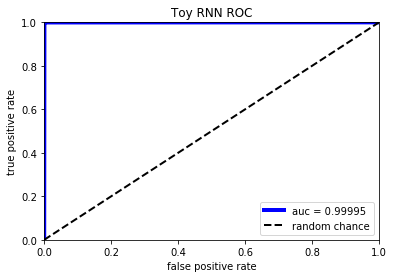

In [18]:
# Plot ROC
predict = best_model.predict(X_batch_test)
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(Y_batch_test[0][:,1], predict[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=4, color='b', label='auc = %.5f' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', label='random chance')
plt.xlim([0, 1.0])
plt.ylim([0, 1.0])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Toy RNN ROC')
plt.legend(loc="lower right")
plt.show()

In [19]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    print(hist.keys())
    hist['epoch'] = history.epoch
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_loss'],
           label = 'Val Error')
    plt.legend()
    plt.show()

plot_history(history)

NameError: name 'history' is not defined